In [2]:
import pandas as pd
path="E:/2022国赛/C题"
file1 = pd.read_excel(path+"/1.xlsx",sheet_name='表单1')
file2 = pd.read_excel(path+"/1.xlsx",sheet_name='表单2')
file3 = pd.read_excel(path+"/1.xlsx",sheet_name='表单3')

# 1 问题三

# 1.1数据预处理

In [3]:
from tqdm import tqdm
import re
tqdm.pandas()

def clear_id(s):
    ss = str(s)
    n = int(re.findall(r"\d+",ss)[0])
    return n
file2['id'] = file2['文物采样点'].progress_apply(clear_id)
file1['id'] = file1['文物编号'].progress_apply(clear_id)


100%|██████████████████████████████████████████████████████████████████████████████████████████| 58/58 [00:00<?, ?it/s]


In [4]:
cols = ['表面风化', '二氧化硅(SiO2)',
       '氧化钠(Na2O)', '氧化钾(K2O)', '氧化钙(CaO)', '氧化镁(MgO)', '氧化铝(Al2O3)',
       '氧化铁(Fe2O3)', '氧化铜(CuO)', '氧化铅(PbO)', '氧化钡(BaO)', '五氧化二磷(P2O5)',
       '氧化锶(SrO)', '氧化锡(SnO2)', '二氧化硫(SO2)']


In [5]:
file_data = pd.merge(file1,file2,on='id')
Gao_data = file_data[file_data['类型']=='高钾'][cols]
Qian_data = file_data[file_data['类型']=='铅钡'][cols]
test_all = file3[cols]


In [6]:
Qian_data = Qian_data.fillna(0)
Gao_data = Gao_data.fillna(0)
test_all = test_all.fillna(0)

In [7]:
train_all = pd.concat([Gao_data,Qian_data])
encode_data = pd.concat([train_all,test_all])
len(train_all)

69

In [8]:
from sklearn.preprocessing import LabelEncoder

all_data = pd.DataFrame() # 用于存放编码后的训练数据
label = LabelEncoder() # 标号编码器
X= encode_data
for c in X.columns: # 对每个特征列
    if X[c].dtype=='object': # 如果是字符串形式的(字符串读到pandas里dtype是object)
        all_data[c] = label.fit_transform(X[c]) # 将整个这一列进行标号编码，写到新的dataframe里
    else: # 其它类型的特征(数值,布尔)保持原样写入
        all_data[c] = list(X[c])


In [9]:
train = all_data[0:len(train_all)]
test = all_data[len(train_all):]


In [10]:
test

,表面风化,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2)
69,0,78.45,0.0,0.00,6.08,1.86,7.23,2.15,2.11,0.00,0.00,1.06,0.03,0.00,0.51
70,1,37.75,0.0,0.00,7.63,0.00,2.33,0.00,0.00,34.30,0.00,14.27,0.00,0.00,0.00
71,0,31.95,0.0,1.36,7.19,0.81,2.93,7.06,0.21,39.58,4.69,2.68,0.52,0.00,0.00
72,0,35.47,0.0,0.79,2.89,1.05,7.07,6.45,0.96,24.28,8.31,8.45,0.28,0.00,0.00
73,1,64.29,1.2,0.37,1.64,2.34,12.75,0.81,0.94,12.23,2.16,0.19,0.21,0.49,0.00
74,1,93.17,0.0,1.35,0.64,0.21,1.52,0.27,1.73,0.00,0.00,0.21,0.00,0.00,0.00
75,1,90.83,0.0,0.98,1.12,0.00,5.06,0.24,1.17,0.00,0.00,0.13,0.00,0.00,0.11
76,0,51.12,0.0,0.23,0.89,0.00,2.12,0.00,9.01,21.24,11.34,1.46,0.31,0.00,2.26


In [11]:

from sklearn.model_selection import train_test_split # 拆分数据
import numpy as np
X_var,y_var= train,[0]*len(Gao_data)+[1]*len(Qian_data)
# X_var,y_var= train.iloc[:,1:],train['表面风化']

X_train, X_test, y_train, y_test = train_test_split(X_var, y_var, test_size = 0.2, random_state = 123)
X_var

,表面风化,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2)
0,0,69.33,0.00,9.99,6.32,0.87,3.93,1.74,3.87,0.00,0.00,1.17,0.00,0.0,0.39
1,0,87.05,0.00,5.19,2.01,0.00,4.06,0.00,0.78,0.25,0.00,0.66,0.00,0.0,0.00
2,0,61.71,0.00,12.37,5.87,1.11,5.50,2.16,5.09,1.41,2.86,0.70,0.10,0.0,0.00
3,0,65.88,0.00,9.67,7.12,1.56,6.44,2.06,2.18,0.00,0.00,0.79,0.00,0.0,0.36
4,0,61.58,0.00,10.95,7.35,1.77,7.50,2.62,3.27,0.00,0.00,0.94,0.06,0.0,0.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,1,17.11,0.00,0.00,0.00,1.11,3.65,0.00,1.34,58.46,0.00,14.13,1.12,0.0,0.00
65,0,49.01,2.71,0.00,1.13,0.00,1.45,0.00,0.86,32.92,7.95,0.35,0.00,0.0,0.00
66,1,29.15,0.00,0.00,1.21,0.00,1.85,0.00,0.79,41.25,15.45,2.54,0.00,0.0,0.00
67,1,25.42,0.00,0.00,1.31,0.00,2.18,0.00,1.16,45.10,17.30,0.00,0.00,0.0,0.00


## 1.2 建立决策树

In [12]:

from sklearn.tree import DecisionTreeClassifier as dtc # 树算法
from sklearn.metrics import accuracy_score
model = dtc(criterion = 'entropy', max_depth = 4)
model.fit(X_train, y_train)
pred_model = model.predict(X_test)
print(accuracy_score(y_test, pred_model))


1.0


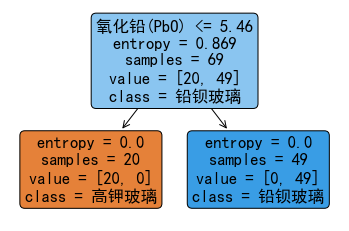

In [56]:

from sklearn.tree import plot_tree # 树图
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']   #解决中文显示问题
plt.rcParams['axes.unicode_minus'] = False    # 解决中文显示问题
model = dtc(criterion = 'entropy', max_depth = 4)
model.fit(X_var, y_var)
feature_names = X_var.columns
target_names = ['高钾玻璃','铅钡玻璃']
 
plot_tree(model, 
          feature_names = feature_names, 
          class_names = target_names, 
          filled = True, 
          rounded = True)
 
plt.savefig('E:/2022国赛/C题/问题三代码及图片/问题三代码及图片/pic/决策树可视化.png')
plt.show()

In [14]:
# 预测结果为：高钾,铅钡,铅钡,铅钡,铅钡,高钾,高钾,铅钡
model.predict(test)

array([0, 1, 1, 1, 1, 0, 0, 1])

## 2.3 判断亚类

In [54]:

from sklearn.cluster import AgglomerativeClustering #导入sklearn的层次聚类函数
df1 = all_data[0:len(Gao_data)]
data1 = np.array(df1)
gao_test = test.iloc[[0,5,6]]
clf1 = AgglomerativeClustering(n_clusters = 4, linkage = 'ward')
s = clf1.fit(data1)
pred1 = clf1.fit_predict(test)

In [51]:
# Gao_data=Gao_data.drop('表面风化',axis=1)
test=pd.concat([Gao_data,gao_test])
test=test.drop('表面风化',axis=1)
test

,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2)
0,69.33,0.00,9.99,6.32,0.87,3.93,1.74,3.87,0.00,0.00,1.17,0.00,0.00,0.39
2,87.05,0.00,5.19,2.01,0.00,4.06,0.00,0.78,0.25,0.00,0.66,0.00,0.00,0.00
3,61.71,0.00,12.37,5.87,1.11,5.50,2.16,5.09,1.41,2.86,0.70,0.10,0.00,0.00
4,65.88,0.00,9.67,7.12,1.56,6.44,2.06,2.18,0.00,0.00,0.79,0.00,0.00,0.36
5,61.58,0.00,10.95,7.35,1.77,7.50,2.62,3.27,0.00,0.00,0.94,0.06,0.00,0.47
6,67.65,0.00,7.37,0.00,1.98,11.15,2.39,2.51,0.20,1.38,4.18,0.11,0.00,0.00
7,59.81,0.00,7.68,5.41,1.73,10.05,6.04,2.18,0.35,0.97,4.50,0.12,0.00,0.00
8,92.63,0.00,0.00,1.07,0.00,1.98,0.17,3.24,0.00,0.00,0.61,0.00,0.00,0.00
11,95.02,0.00,0.59,0.62,0.00,1.32,0.32,1.55,0.00,0.00,0.35,0.00,0.00,0.00
12,96.77,0.00,0.92,0.21,0.00,0.81,0.26,0.84,0.00,0.00,0.00,0.00,0.00,0.00


In [55]:
pred1

array([1, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 3, 1, 3, 0, 0, 2, 2, 0, 2,
       2], dtype=int64)

In [60]:

from sklearn.cluster import AgglomerativeClustering #导入sklearn的层次聚类函数
df1 = all_data[len(Gao_data):len(Gao_data)+len(Qian_data)]
data1 = np.array(df1)
gao_test = test.iloc[[1,2,3,4,7]]
clf1 = AgglomerativeClustering(n_clusters = 5, linkage = 'ward')
s = clf1.fit(data1)
pred1 = clf1.fit_predict(test)
pred1

array([2, 0, 0, 0, 2, 0, 1, 0, 1, 0, 0, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1,
       2, 4, 4, 2, 1, 1, 4, 4, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 4, 2, 1, 4,
       4, 1, 2, 2, 2, 3, 3, 3, 3, 3], dtype=int64)

In [59]:
# Gao_data=Gao_data.drop('表面风化',axis=1)
test=pd.concat([Qian_data,gao_test])
test=test.drop('表面风化',axis=1)
test

,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2)
1,36.28,0.00,1.05,2.34,1.18,5.73,1.86,0.26,47.43,0.00,3.57,0.19,0.00,0.00
9,20.14,0.00,0.00,1.48,0.00,1.34,0.00,10.41,28.68,31.23,3.59,0.37,0.00,2.58
10,4.61,0.00,0.00,3.19,0.00,1.11,0.00,3.14,32.45,30.62,7.56,0.53,0.00,15.03
13,33.59,0.00,0.21,3.51,0.71,2.69,0.00,4.93,25.39,14.61,9.38,0.37,0.00,0.00
21,29.64,0.00,0.00,2.93,0.59,3.57,1.33,3.51,42.82,5.35,8.83,0.19,0.00,0.00
22,37.36,0.00,0.71,0.00,0.00,5.45,1.51,4.78,9.30,23.55,5.75,0.00,0.00,0.00
25,53.79,7.92,0.00,0.50,0.71,1.42,0.00,2.99,16.98,11.86,0.00,0.33,0.00,0.00
26,31.94,0.00,0.00,0.47,0.00,1.59,0.00,8.46,29.14,26.23,0.14,0.91,0.00,0.00
27,50.61,2.31,0.00,0.63,0.00,1.90,1.55,1.12,31.90,6.65,0.19,0.20,0.00,0.00
28,19.79,0.00,0.00,1.44,0.00,0.70,0.00,10.57,29.53,32.25,3.13,0.45,0.00,1.96
